<a href="https://colab.research.google.com/github/meoowqt/pythonDataLab/blob/main/LW4_statistic_data_analysis_Vechkanova_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа #4: Статистический анализ

In [ ]:
!pip install pingouin --quiet

In [ ]:
import pingouin as pg
import scipy.stats

###Задание 1
Загрузить в pandas любой **мультиклассовый** датасет, имеющий минимум 4 вещественных и 1 категориальный признак.
В данном задании к датасетам будут предъвляться дополнительные требования:
1. Хотя бы 2 вещественных признака обязательно должны содержать числа с плавающей запятой
2. Должен присутствовать обазятельно хотя бы 1 категориальный признак (если его нет, то можно создать на основе имеющихся, но метод порождения признака должен быть обоснован)
3. Категориальный признак должен подразумевать наличие хотя бы 3-х категорий, бинарные датасеты будут считаться как ошибка во всей лабораторной
4. Количество категорий не должно привышать 10 (можете урезать датасет для выполнения этого пункта)
5. Никаких стандартных датасетов из библиотек наподобие sklearn, только датасеты со сторонних источников наподобие kaggle

In [ ]:
import pandas as pd

df = pd.read_excel('1.xls')
df = df.dropna()
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


###Задание 2
2.1 Для всех вещественных признаков постройте следующие матрицы:
1. Корреляции Пирсона
2. Раногвой корреляции Спирмена
3. Корреляции Кендалла

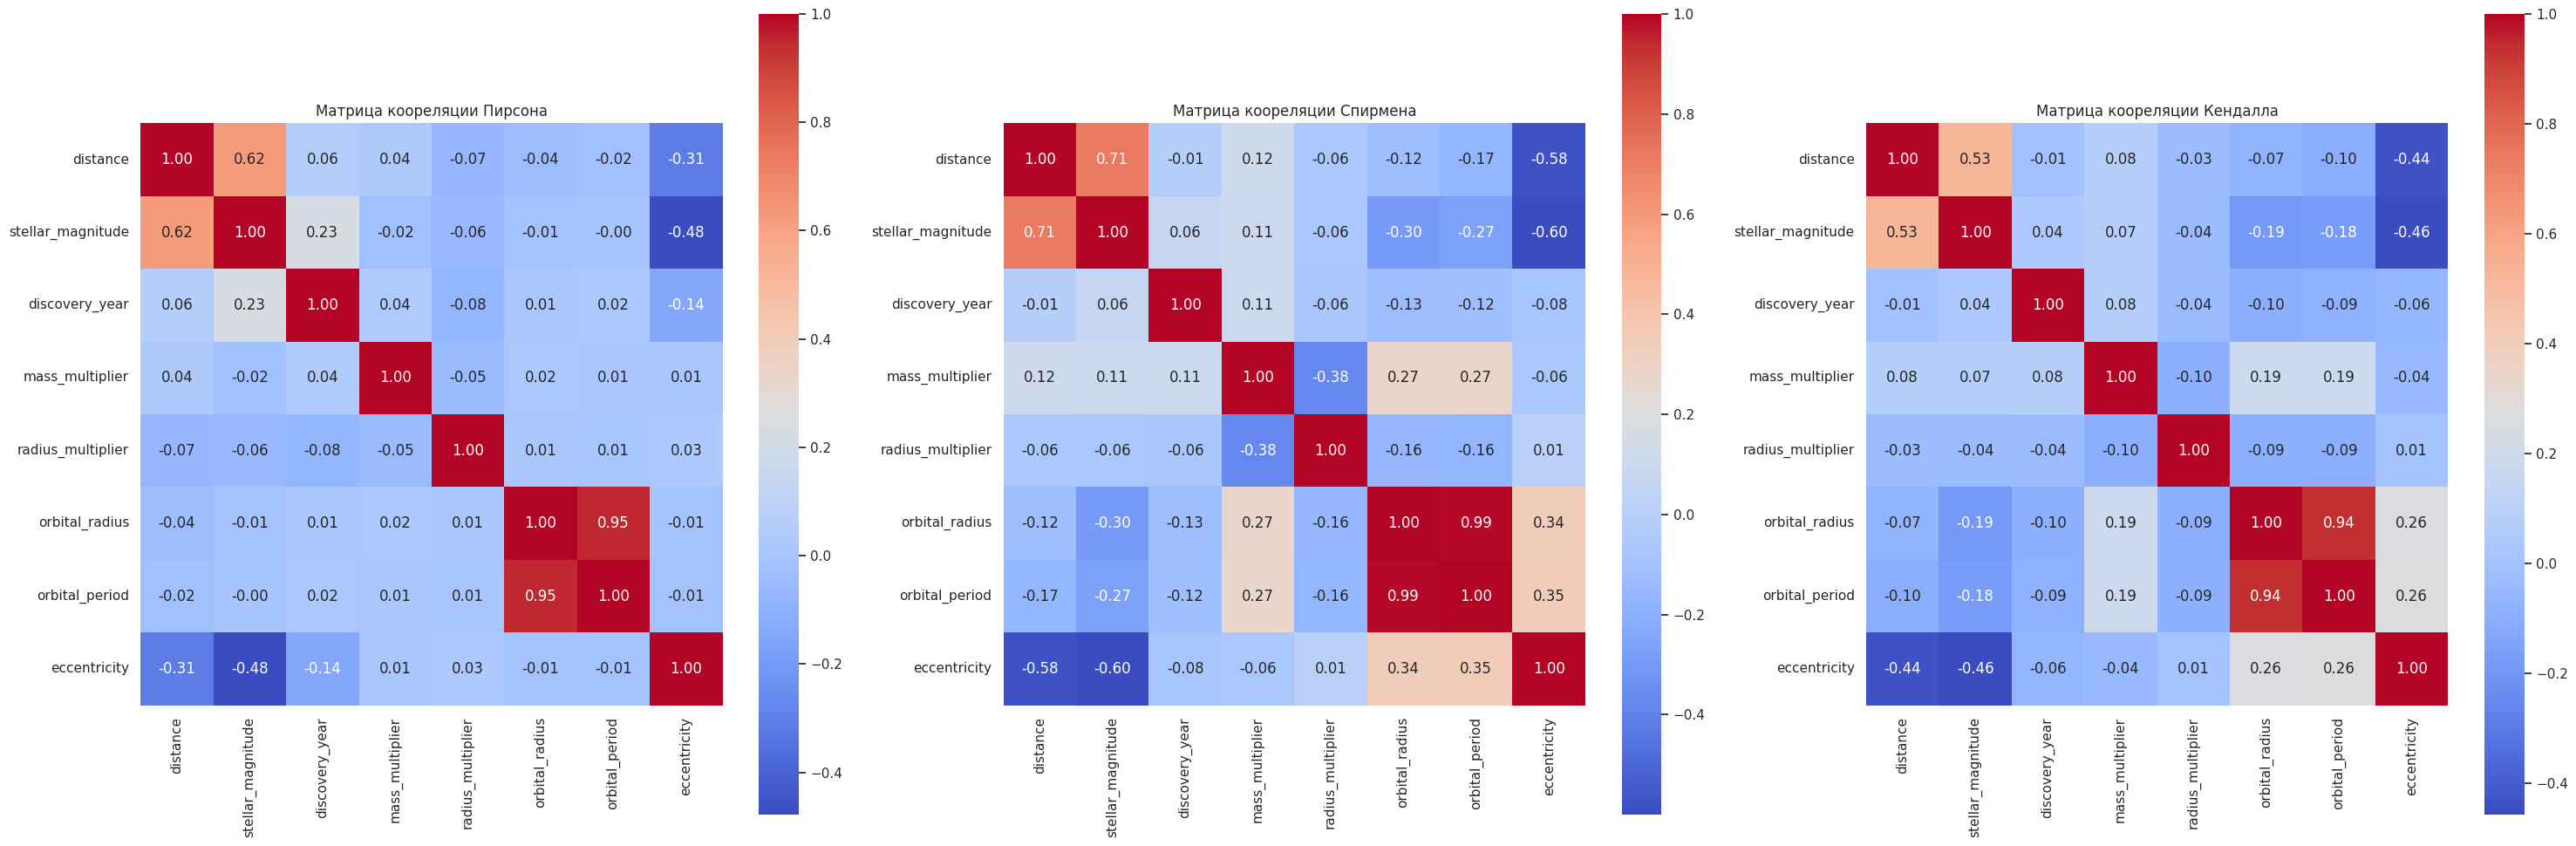

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

pearson_corr = df[numeric_cols].corr(method='pearson')
spearman_corr = df[numeric_cols].corr(method='spearman')
kendall_corr = df[numeric_cols].corr(method='kendall')

sns.set(style="white")
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

corr_methods = {
    "Пирсона": pearson_corr,
    "Спирмена": spearman_corr,
    "Кендалла": kendall_corr
}

for i, (method, corr_matrix) in enumerate(corr_methods.items()):
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True, ax=axes[i])
    axes[i].set_title(f"Матрица коореляции {method}")

fig.tight_layout()
plt.show()

2.2 Проведите тест на нормальное распределение данных каждого вещественного признака с учетом уровня значимости `0.05`. Если ни один признак не прошел тест, создайте временный псевдо-признак, обладающий нормальным расределением и проведите тест на нем. Для каждого признака постройте QQ-график (в том ичсле и для псевдо-признака).

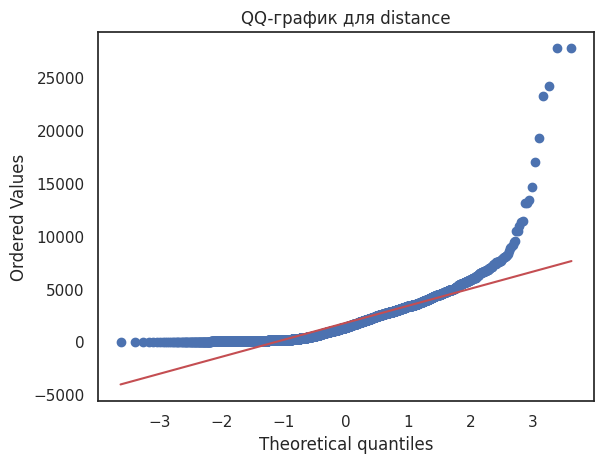

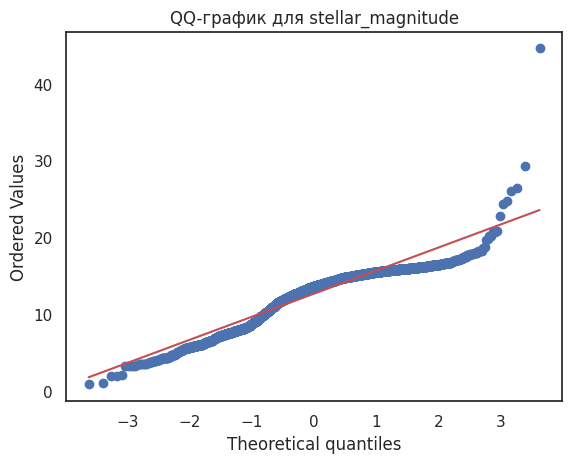

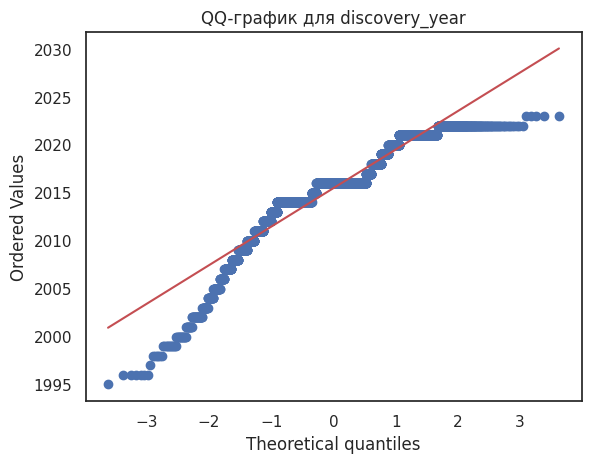

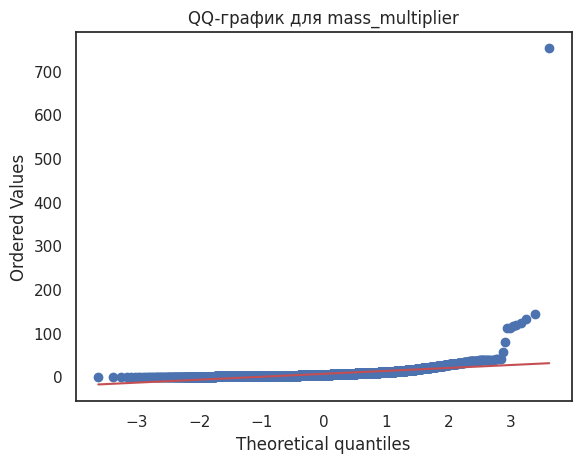

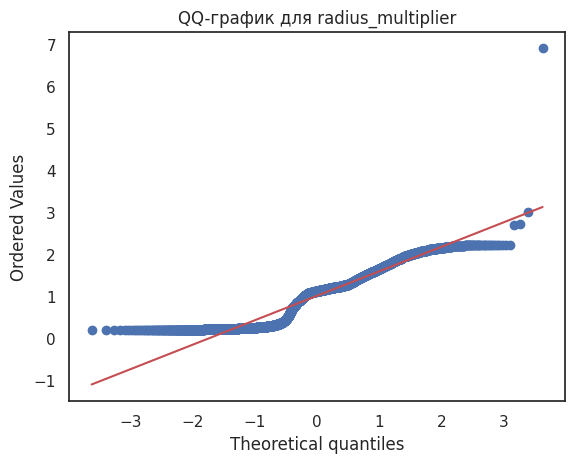

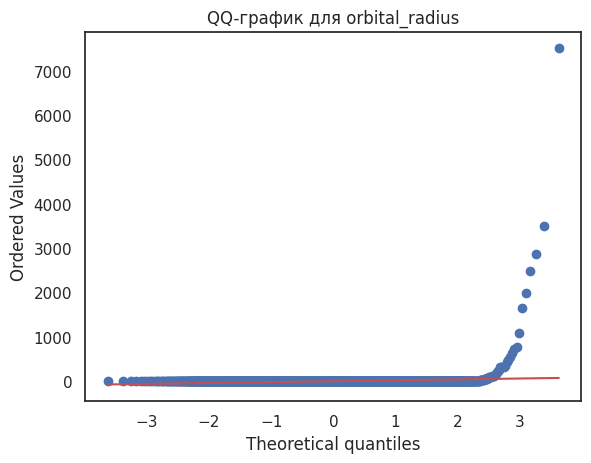

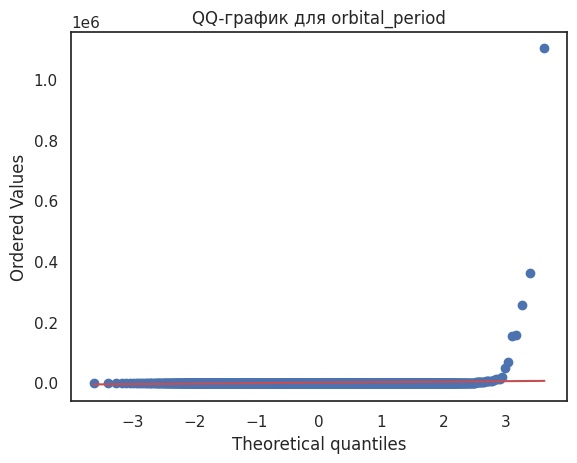

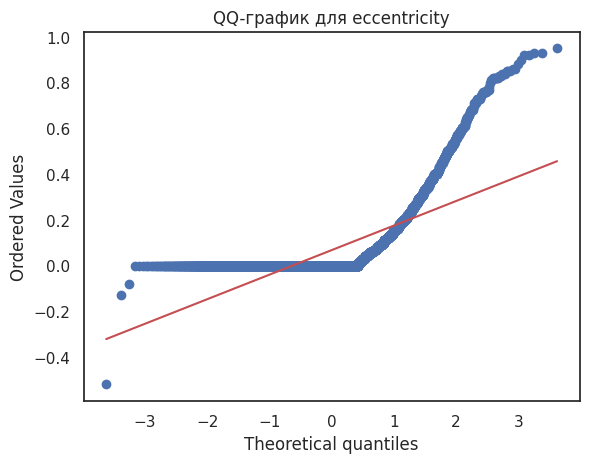

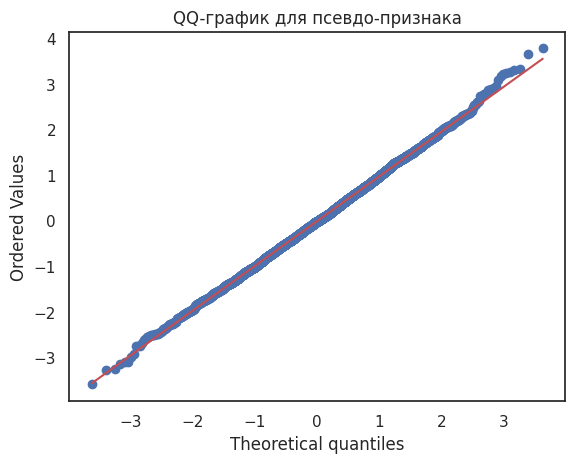

In [ ]:
import scipy.stats as stats

any_feature_passed_normality_test = False
for col in numeric_cols:
    normal_test_statistic, p_value = stats.normaltest(df[col])
    if p_value > 0.05:
        any_feature_passed_normality_test = True
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ-график для {col}')
    plt.show()

if not any_feature_passed_normality_test:
    pseudo_normal = np.random.normal(loc=0, scale=1, size=len(df))
    normal_test_statistic, p_value = stats.normaltest(pseudo_normal)

    stats.probplot(pseudo_normal, dist="norm", plot=plt)
    plt.title('QQ-график для псевдо-признака')
    plt.show()
    df['pseudo_normal'] = pseudo_normal

2.3 Для каждого признака проведите регрессионный анализ. Выберите на основе матрицы корреляции Пирсона из задания 2.1 4 самых коррелируемых паря признаков и постройте график с прямой, отражающей результат работы обученной модели регрессии  

<ipython-input-34-032dc5f0881d>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (feature_x, feature_y), corr in top_pairs.iteritems():


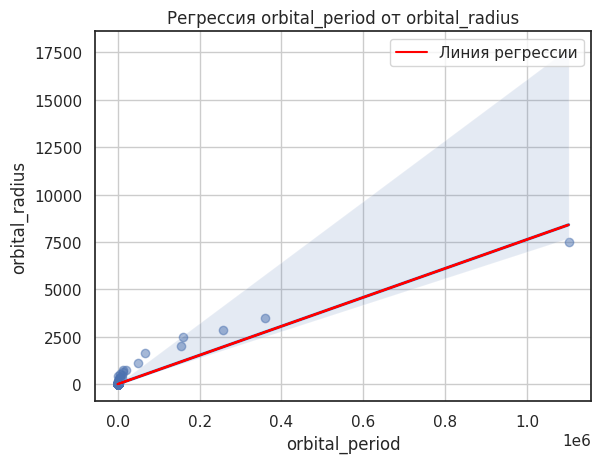

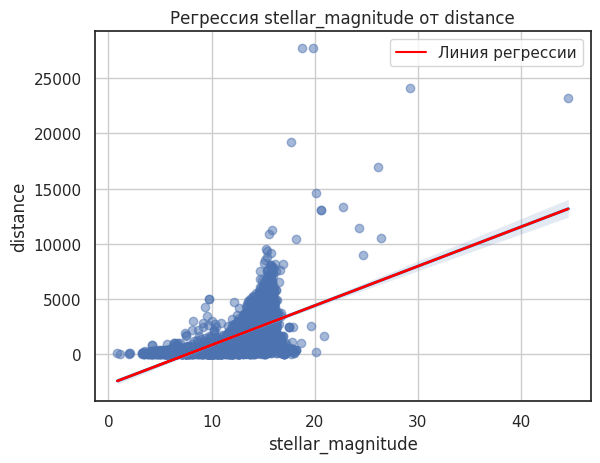

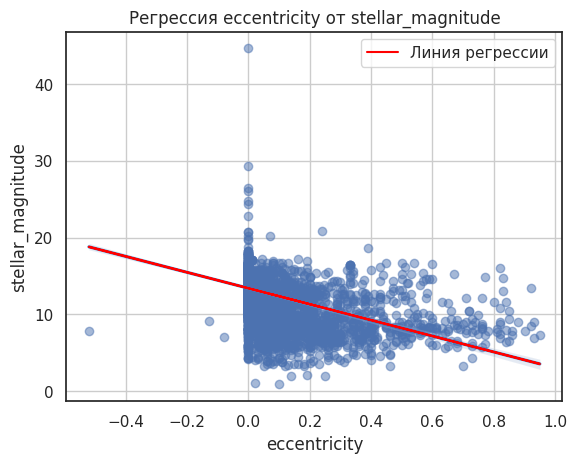

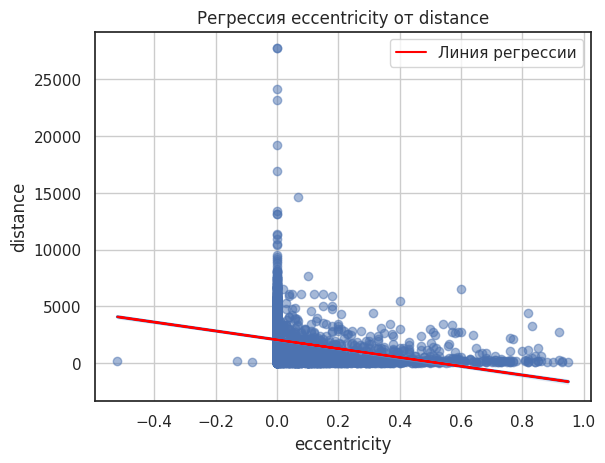

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

top_n = 4
corr_matrix = pearson_corr.abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
top_pairs = upper_triangle.unstack().sort_values(ascending=False)

for (feature_x, feature_y), corr in top_pairs.iteritems():
    if feature_x != feature_y:
        results = pg.linear_regression(df[feature_x], df[feature_y])
        intercept, slope = results['coef'][0], results['coef'][1]
        fig, ax = plt.subplots()
        sns.regplot(x=df[feature_x], y=df[feature_y], lowess=False, scatter_kws={'alpha': 0.5}, ax=ax)
        ax.plot(df[feature_x], intercept + slope * df[feature_x], color='red', label='Линия регрессии')
        ax.set_title(f'Регрессия {feature_x} от {feature_y}')
        ax.set_xlabel(feature_x)
        ax.set_ylabel(feature_y)
        plt.grid(True)
        plt.legend()
        plt.show()
        top_n -= 1
        if top_n <= 0:
            break

###Задание 3
3.1 Проведите дисперсионный анализ признаков с учетом гипотезы о равенстве дисперсий (подсказка: тест Бартлетта).

*Уровень значимости дла всех тестов в задании должен быть `0.05`*

In [ ]:
bartlett_results = {}

for col in numeric_cols:
    result = pg.homoscedasticity(df, dv=col, group='planet_type', method="bartlett", alpha=0.05)
    bartlett_results[col] = result

for col, result in bartlett_results.items():
    print(f"Результаты теста Бартлетта для '{col}':")
    if result["pval"].item() < 0.05:
      print("Отрицательный")
    else:
      print("Положительный")

Результаты теста Бартлетта для 'distance':
Отрицательный
Результаты теста Бартлетта для 'stellar_magnitude':
Отрицательный
Результаты теста Бартлетта для 'discovery_year':
Отрицательный
Результаты теста Бартлетта для 'mass_multiplier':
Отрицательный
Результаты теста Бартлетта для 'radius_multiplier':
Отрицательный
Результаты теста Бартлетта для 'orbital_radius':
Отрицательный
Результаты теста Бартлетта для 'orbital_period':
Отрицательный
Результаты теста Бартлетта для 'eccentricity':
Отрицательный


In [ ]:
anova_welch_results = {}

for col in numeric_cols:
    result = pg.welch_anova(dv=col, between='planet_type', data=df)
    anova_welch_results[col] = result

for col, result in anova_welch_results.items():
    print(f"Результаты теста anova welch для '{col}':")
    if result["p-unc"].item() < 0.05:
      print("Отрицательный")
    else:
      print("Положительный")

Результаты теста anova welch для 'distance':
Отрицательный
Результаты теста anova welch для 'stellar_magnitude':
Отрицательный
Результаты теста anova welch для 'discovery_year':
Отрицательный
Результаты теста anova welch для 'mass_multiplier':
Отрицательный
Результаты теста anova welch для 'radius_multiplier':
Отрицательный
Результаты теста anova welch для 'orbital_radius':
Отрицательный
Результаты теста anova welch для 'orbital_period':
Отрицательный
Результаты теста anova welch для 'eccentricity':
Отрицательный


3.2 Если анализ не подтвердил нулевую гипотезу, проведите соответствующий вашему случаю post-hoc тест на попарное равенство мат. ожиданий. Выведите сводную таблицу признаков, попарно отличающихся друг от друга

In [59]:
games_howell_results = {}

for col in numeric_cols:
    result = pg.pairwise_gameshowell(data=df, dv=col, between='planet_type')
    games_howell_results[col] = result

for col, result in games_howell_results.items():
    result_neg = result[result['pval'] < 0.05][['A', 'B', 'pval']]
    if not result_neg.empty:
        print(f"Отрицательные пары по тесту Геймса-Хоуелла для '{col}':")
        print(result_neg)

Отрицательные пары по тесту Геймса-Хоуелла для 'distance':
              A             B          pval
0     Gas Giant  Neptune-like  0.000000e+00
1     Gas Giant   Super Earth  0.000000e+00
2     Gas Giant   Terrestrial  3.812628e-03
3  Neptune-like   Super Earth  9.193699e-06
4  Neptune-like   Terrestrial  0.000000e+00
5   Super Earth   Terrestrial  1.606524e-09
Отрицательные пары по тесту Геймса-Хоуелла для 'stellar_magnitude':
              A             B          pval
0     Gas Giant  Neptune-like  1.476597e-13
1     Gas Giant   Super Earth  0.000000e+00
2     Gas Giant   Terrestrial  1.764144e-13
3  Neptune-like   Super Earth  7.351771e-03
5   Super Earth   Terrestrial  2.085734e-03
Отрицательные пары по тесту Геймса-Хоуелла для 'discovery_year':
           A             B          pval
0  Gas Giant  Neptune-like  3.276268e-13
1  Gas Giant   Super Earth  0.000000e+00
2  Gas Giant   Terrestrial  4.474199e-14
Отрицательные пары по тесту Геймса-Хоуелла для 'mass_multiplier':
      